In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from rich import print as rprint
from torch import nn

from analysis.common import alignment, plotsvals, sab, trajectories
from koopmann import aesthetics
from koopmann.data import (
    DatasetConfig,
    create_data_loader,
    get_dataset_class,
)
from koopmann.models import MLP, ResMLP
from koopmann.models.utils import parse_safetensors_metadata
from koopmann.utils import (
    compute_model_accuracy,
)
from koopmann.visualization import plot_decision_boundary

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
residual = True
model_name = "mnist_model"

In [67]:
if residual:
    file_path = f"/scratch/nsa325/koopmann_model_saves/{model_name}_residual.safetensors"
    model, _ = ResMLP.load_model(file_path)
else:
    file_path = f"/scratch/nsa325/koopmann_model_saves/{model_name}.safetensors"
    model, _ = MLP.load_model(file_path)
model.eval()
model.hook_model()

model.summary()

Layer (type (var_name))                            Param #
ResMLP (ResMLP)                                    --
+ Sequential (_features)                           --
|    + LinearLayer (0)                             --
|    |    + Sequential (layers)                    402,432
|    + ResidualBlock (1)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (2)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (3)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (4)                           --
|    |    + LinearLayer (fc1)                      263,168
|    |    + LinearLayer (fc2)                      263,168
|    + ResidualBlock (5)        

In [68]:
# Dataset config
metadata = parse_safetensors_metadata(file_path=file_path)
rprint(metadata)
dataset_config = DatasetConfig(
    dataset_name=metadata["dataset"],
    num_samples=3_000,
    split="test",
    seed=42,
)
DatasetClass = get_dataset_class(name=dataset_config.dataset_name)
dataset = DatasetClass(config=dataset_config)

{
    'batchnorm': 'True',
    'bias': 'False',
    'config': '[512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512]',
    'dataset': 'MNISTDataset',
    'input_dimension': '784',
    'nonlinearity': 'relu',
    'output_dimension': '10'
}

In [69]:
rprint(f"Testing Accuracy: {compute_model_accuracy(model, dataset)}")

KeyboardInterrupt: 

In [70]:
if dataset.in_features == 2:
    plot_decision_boundary(
        model,
        model.state_dict(),
        dataset.features,
        dataset.labels.squeeze(),
        labels=[0, 1, 2],
    )

In [71]:
metadata = parse_safetensors_metadata(file_path=file_path)
dataset_config = DatasetConfig(
    dataset_name=metadata["dataset"],
    num_samples=5_000,
    split="test",
    seed=21,
)
DatasetClass = get_dataset_class(name=dataset_config.dataset_name)
dataset = DatasetClass(config=dataset_config)
dataloader = create_data_loader(dataset, batch_size=1024)

BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=784, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bias=True)
BN module BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True) was asborbed into layer Linear(in_features=512, out_features=512, bia

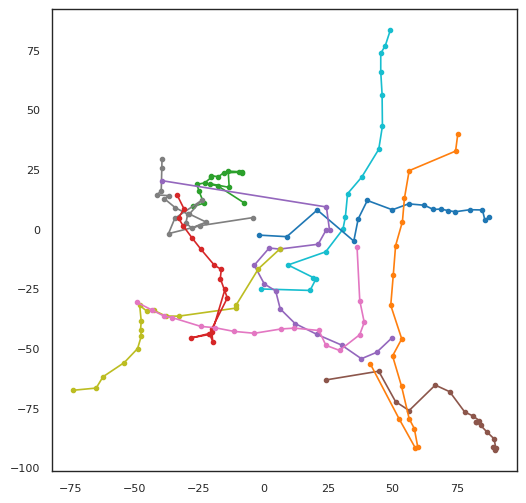

torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
torch.Size([1, 512])
svding layer 0
tensor([ 7.6294e-06, -3.8147e-06, -1.4305e-06, -1.1921e-06, -4.7684e-07,
        -1.7285e-06, -3.5763e-07,  9.2387e-07, -1.4901e-08,  4.4703e-07,
        -7.4506e-08,  1.9372e-07,  3.4273e-07, -5.2154e-08,  1.5274e-07,
        -2.9430e-07, -1.1548e-07,  7.0781e-08,  3.6880e-07,  4.8429e-08,
         2.9802e-08,  8.3819e-09,  0.0000e+00,  3.0734e-08,  1.3970e-07,
         3.2596e-09,  1.4901e-08,  1.3970e-09,  1.0245e-08, -1.3970e-09,
        -3.5157e-08,  3.1432e-08, -1.6298e-08,  1.3271e-08, -4.6566e-10])
tensor([7.0981e+00, 6.5664e+00, 2.8311e+00, 1.7364e+00, 1.0085e+00, 5.9436e-01,
        4.3387e-01, 3.4626e-01, 2.0143e-01, 1.4907e-01, 1

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


fit_line 0.4123919606208801


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


In [72]:
if residual:
    sab(model)
    trajectories(model, dataloader, 10, 1)
    images, labels = next(iter(dataloader))
    x = images[0]
    _ = model(x)
    acts, patts = model.get_fwd_acts_patts()
    acts = list(acts.values())
    patts = list(patts.values())
    JUSV = plotsvals(acts, patts, title="Test")
    alignment(acts, patts, title="Test", JUSV=JUSV)